In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
total_acorn = pd.read_parquet('total_acorn.gzip')

affluent = total_acorn.loc[total_acorn['acorn_category'] == 'Affluent']['house_id']
comfortable = total_acorn.loc[total_acorn['acorn_category'] == 'Comfortable']['house_id']
adversity = total_acorn.loc[total_acorn['acorn_category'] == 'Adversity']['house_id']

In [87]:
consumption = pd.read_parquet('total_usage_2013.gzip')

consumption['year'] = consumption['date_time'].dt.year
consumption['month'] = consumption['date_time'].dt.month
consumption['day'] = consumption['date_time'].dt.day
consumption['hour'] = consumption['date_time'].dt.hour
consumption['day_of_week'] = consumption['date_time'].dt.dayofweek

consumption['DT'] = pd.to_datetime(consumption[['year', 'month', 'day', 'hour']])

consumption.head()

,house_id,treated,date_time,KWH/hh,year,month,day,hour,day_of_week,DT
0,MAC000002,False,2013-01-01 00:00:00,0.219,2013,1,1,0,1,2013-01-01 00:00:00
1,MAC000002,False,2013-01-01 00:30:00,0.241,2013,1,1,0,1,2013-01-01 00:00:00
2,MAC000002,False,2013-01-01 01:00:00,0.191,2013,1,1,1,1,2013-01-01 01:00:00
3,MAC000002,False,2013-01-01 01:30:00,0.235,2013,1,1,1,1,2013-01-01 01:00:00
4,MAC000002,False,2013-01-01 02:00:00,0.182,2013,1,1,2,1,2013-01-01 02:00:00


In [2]:
temp = pd.read_csv('POWER_Point_Hourly_20120101_20140228_051d5072N_000d1276E_LST_no_header.csv', usecols=['YEAR', 'MO', 'DY', 'HR', 'T2M'])
temp.columns = ['year', 'month', 'day', 'hour', 'temp']
temp['DT'] = pd.to_datetime(temp[['year', 'month', 'day', 'hour']])
temp.set_index('DT', inplace=True)

# remove feb 29, 2012
temp = temp.loc[(temp.index != '2012-02-29')]

temp.head()

,year,month,day,hour,temp
DT,,,,,
2012-01-01 00:00:00,2012,1,1,0,11.12
2012-01-01 01:00:00,2012,1,1,1,11.06
2012-01-01 02:00:00,2012,1,1,2,11.00
2012-01-01 03:00:00,2012,1,1,3,10.99
2012-01-01 04:00:00,2012,1,1,4,10.96


In [89]:
consumption_sliced = consumption.loc[(consumption['date_time'] >= '2013-03-01') & (consumption['date_time'] < '2013-06-01')]

In [77]:
def get_socio(df, socio):
    return df.loc[df['house_id'].isin(socio)]

In [90]:
total_usage_affluent = get_socio(consumption_sliced, affluent)
total_usage_comfortable = get_socio(consumption_sliced, comfortable)
total_usage_adversity = get_socio(consumption_sliced, adversity)

In [83]:
def do_things(consumption, temp):
    grouped_hourly = consumption.groupby([consumption['DT'], consumption['house_id']])['KWH/hh'].sum()
    hourly_mean = grouped_hourly.unstack().median(axis=1)
    hourly_mean = hourly_mean.to_frame(name='KWH/h')
    joined_hourly_temp = hourly_mean.join(temp, on='DT')
    return joined_hourly_temp

In [91]:
hourly_temp_affluent = do_things(total_usage_affluent, temp_2013)
hourly_temp_comfortable = do_things(total_usage_comfortable, temp_2013)
hourly_temp_adversity = do_things(total_usage_adversity, temp_2013)

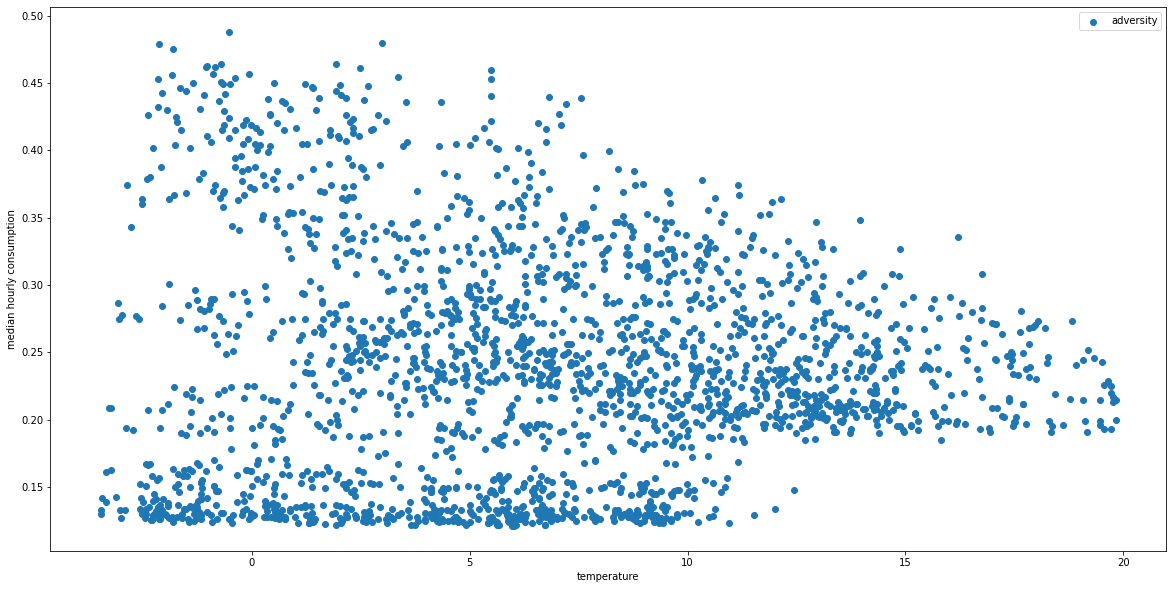

In [95]:
plt.figure(figsize=(20, 10))
# plt.scatter(hourly_temp_affluent['temp'], hourly_temp_affluent['KWH/h'], label='affluent')
# plt.scatter(hourly_temp_comfortable['temp'], hourly_temp_comfortable['KWH/h'], label='comfortable')
plt.scatter(hourly_temp_adversity['temp'], hourly_temp_adversity['KWH/h'], label='adversity')
plt.legend()
plt.xlabel('temperature')
plt.ylabel('median hourly consumption')
plt.show()

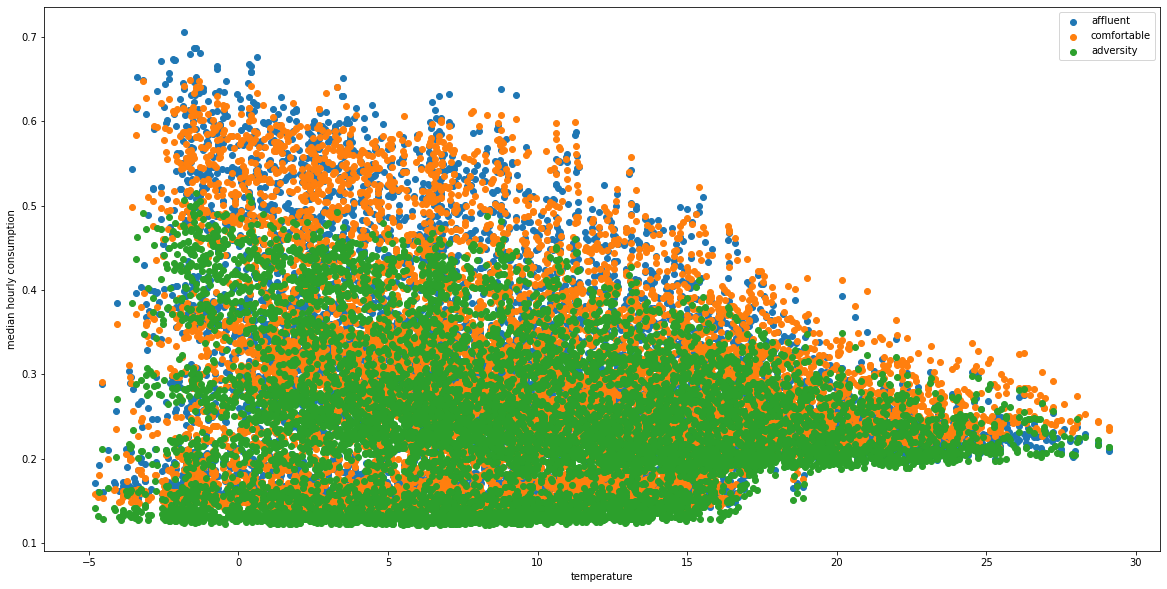

In [85]:
plt.figure(figsize=(20, 10))
plt.scatter(hourly_temp_affluent['temp'], hourly_temp_affluent['KWH/h'], label='affluent')
plt.scatter(hourly_temp_comfortable['temp'], hourly_temp_comfortable['KWH/h'], label='comfortable')
plt.scatter(hourly_temp_adversity['temp'], hourly_temp_adversity['KWH/h'], label='adversity')
plt.legend()
plt.xlabel('temperature')
plt.ylabel('median hourly consumption')
plt.show()

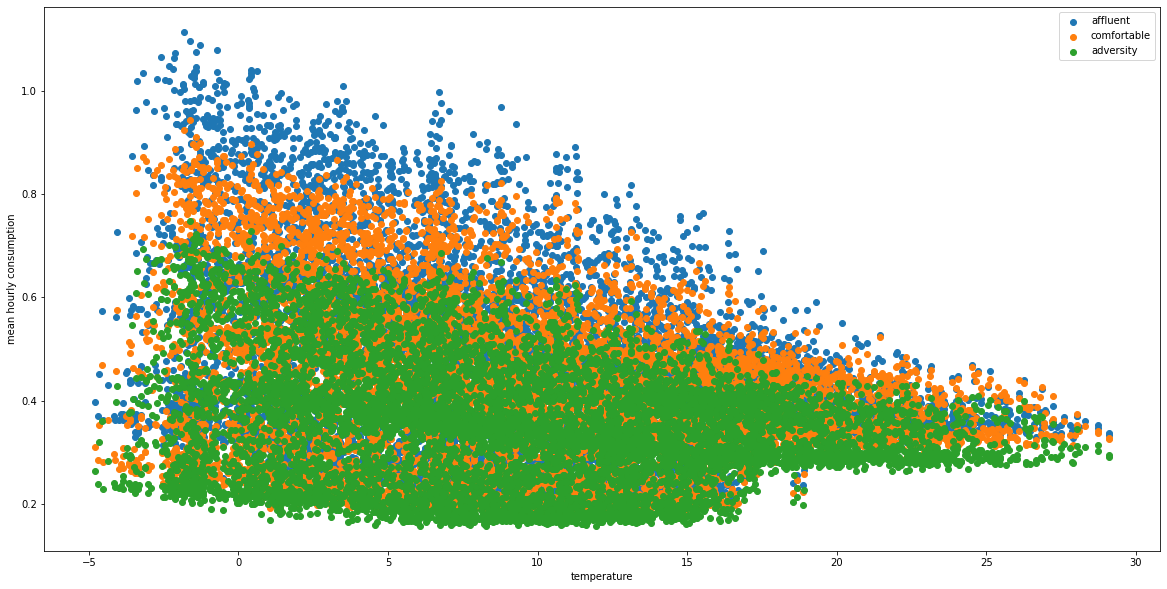

In [82]:
plt.figure(figsize=(20, 10))
plt.scatter(hourly_temp_affluent['temp'], hourly_temp_affluent['KWH/h'], label='affluent')
plt.scatter(hourly_temp_comfortable['temp'], hourly_temp_comfortable['KWH/h'], label='comfortable')
plt.scatter(hourly_temp_adversity['temp'], hourly_temp_adversity['KWH/h'], label='adversity')
plt.legend()
plt.xlabel('temperature')
plt.ylabel('mean hourly consumption')
plt.show()

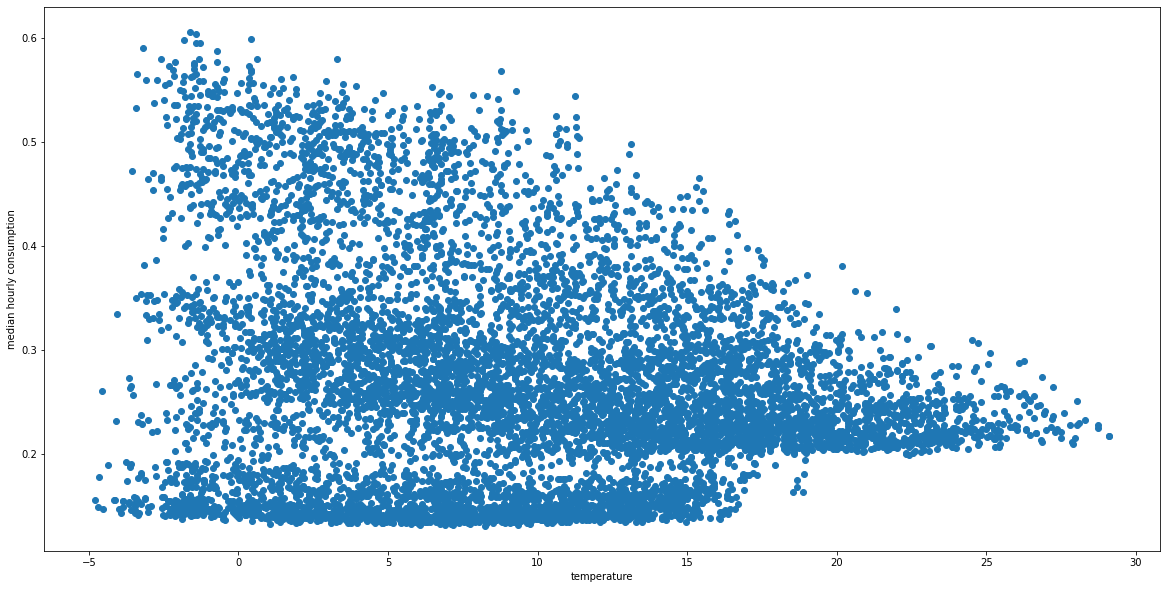

In [68]:
plt.figure(figsize=(20, 10))
plt.scatter(joined_hourly_temp['temp'], joined_hourly_temp['KWH/h'])
plt.xlabel('temperature')
plt.ylabel('median hourly consumption')
plt.show()

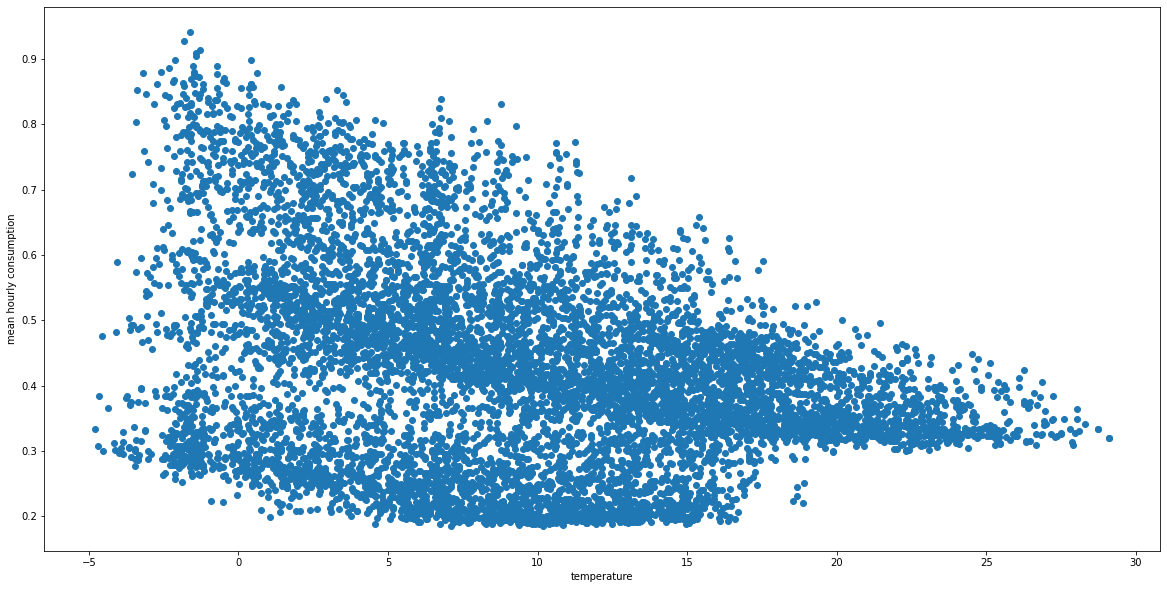

In [72]:
plt.figure(figsize=(20, 10))
plt.scatter(joined_hourly_temp['temp'], joined_hourly_temp['KWH/h'])
plt.xlabel('temperature')
plt.ylabel('mean hourly consumption')
plt.show()

In [56]:
temp_2013 = temp.loc[(temp.index >= '2013-01-01') & (temp.index < '2014-01-01')]
temp_2013.tail()

,year,month,day,hour,temp
DT,,,,,
2013-12-31 19:00:00,2013,12,31,19,4.03
2013-12-31 20:00:00,2013,12,31,20,4.17
2013-12-31 21:00:00,2013,12,31,21,4.19
2013-12-31 22:00:00,2013,12,31,22,4.38
2013-12-31 23:00:00,2013,12,31,23,4.70
